# Off Facebook Activity Report of Dr. David E. Silva
## Joseph Rush

In this analysis, I expect the following websites:
- Github, because Professor Silva accesses it for classes and work
- Instagram, because Professor Silva has used it for prior projects and provided his data
- Stack Overflow or other programming forums, since Dr. Silva regularly writes code and, outside of the classroom, only crazy people and geniuses write every last line from scratch

I don't know what other websites to expect, beyond Flashline and Canvas and other Kent State websites. I don't have a solid grasp on Dr. Silva's internet habits. I suspect that I will find other commonly used websites, like Hulu, Netflix, Google, YouTube, Spotify, and the like. Dr. Silva has mentioned consuming different visual media as well as music, so those should be in the footprint, as well

In [1]:
# Setup
import requests as rq
import pandas as pd
import base64
import json
import urllib
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import stats

In [31]:
with open(r"E:\College\EMAT32110_2-DataInEmergingMediaAndTechnology\230911-facebook-davidsilva100046_year-to_share\apps_and_websites_off_of_facebook\your_off-facebook_activity.json") as likes_json:
    likes_data = json.load(likes_json)

#### Describe the raw data structure and variables included in the data

The data's top layer is an object labeled "off_facebook_activity_v2"

Within that object are 568 dictionaries, each of which is a different website visited. These dictionaries have 2 keys, "name" and "events."

"Name" just has a string with the name of the website, but "Events" contains a dictionary with three more keys, "id," "type," and "timestamp."

In [32]:
# Get the data into a DataFrame without all of it being wrapped inside the useless top layer
fb_df = pd.DataFrame(likes_data['off_facebook_activity_v2'])

In [33]:
# Get the length of each events key, which tells me how many entries it has.
event_count = [len(x['events']) for x in likes_data['off_facebook_activity_v2']]

In [34]:
# Add the list of counts I just generated into my DataFrame
fb_df.insert(1, 'Count', event_count)

In [35]:
# Drop the old 'events' column since I have what I need from it.
new_df = fb_df.drop('events', axis=1)
new_df.head()

,name,Count
0,Spotify: Spotify: Music and Podcasts,1
1,cameo.com,5
2,kent.edu,631
3,Allstate,2
4,Bed Bath & Beyond,2


#### Histogram

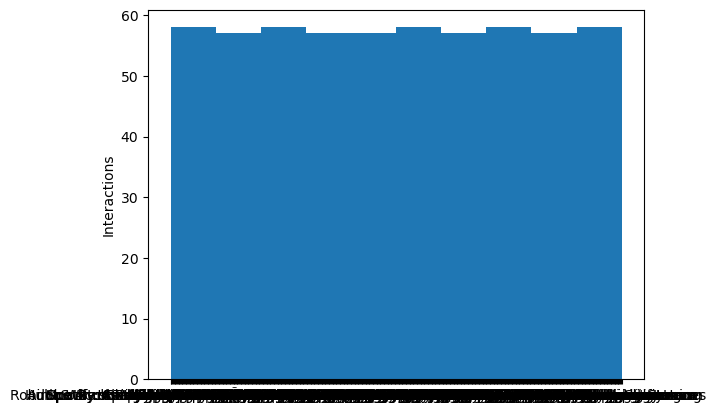

In [36]:
fig4, ax4 = plt.subplots()
ax4.hist(new_df['name'])
ax4.set_ylabel("Interactions")

plt.show()

#### a) What can you conclude about the data from this histogram
Absolutely nothing. There are too many entries in too little space. I can't even read the labels.

#### 20 most logged websites and apps

In [ ]:
trimsort_df = new_df.sort_values(by=['Count'],ascending=False).iloc[:20]

In [ ]:
trimsort_df.head()

In [ ]:
trimsort_df.tail()

In [ ]:
fig5, ax5 = plt.subplots()
ax5.barh(trimsort_df['name'], trimsort_df['Count'])
ax5.invert_yaxis()
ax5.set_xlabel("Interactions")
ax5.set_title("Dr. Silva's 20 most interacted websites according to Facebook")

plt.show()

#### a) What can you conclude about the data from this bar plot?
I can conclude that, of the websites and activity that Facebook is tracking, Dr. Silva has the most interactions with TikTok, Kent.edu, and Hulu. I would especially note that Tiktok has 2 different bars, and Hulu has 3, speaking to some kind of discrepancies under the hood in the data.

#### b) What would Facebook likely conclude from an analysis of this data?
Facebook would conclude that Dr. Silva spends a great deal of his time on those 3 websites, as well as the other top entries.

#### c) Would Facebook’s conclusion be accurate? Why or why not?
It *might* be accurate. This information seems to track all sorts of interactions, not just site visits. So, while Dr. Silva is hitting the most buttons on TikTok, Kent.edu, and Hulu, he might actually spend a great deal more time hanging out on Discord or listening to Spotify, except that he just hits UI buttons much less often on those services.

However, it seems safe to assume that these are a roughly accurate reflection of his online activities, since his top platforms are so much higher than the next ones recorded.

Further, this data is only that which Facebook has access to. There could be whole realms of Dr. Silva's internet activity that are not being tracked.

#### Assesses the quality of the data analysis noting any weaknesses and limitations
The quality of the data analysis has a few key limitations. First, the site names are not being tracked cleanly. The top 20 sites have 3 instances of Hulu and 2 instances of TikTok, and there's not currently anything in the analysis to account for what other redundancy might lurk in the remaining 548 entries.

Second, the analysis is not tracked over any kind of time scale. Over a long enough time, all of this activity becomes negligible, and it's also important to understand when the user is interacting with which sites, whether they are used simultaneously, in sequence, or disparately.

Third, this data analysis did not bother with the types of interactions. Interactions such as a "like" take very little effort, while comments and posts represent greater time and effort for the user. So, it is easy for a deliberately low-effort platform like TikTok to rack up many, many interactions.

#### Reflects on alternative approaches and potential next steps
The next step would be cleaning the data for redundancies. All data for each site should be grouped together, rather than spread out, unless the site distinctions reflect some kind of meaningfully different activity.

After that, the data should be analyzed for trends over time. The first step is just analyzing the time scale of the data, followed by looking at frequencies and clusters of interactions.

If possible, other tracking data should be acquired and correlated with  the existing information to paint a more robust picture of this user's activity.

## Spotify Track Data Analysis Demonstration

The first album I'm choosing is "Deleted Scenes from the Cutting Room Floor" by Caro Emerald. I played and listened to a lot of jazz when I was younger, particularly saxophone since that was what I played, and I burnt out on it completely for a few  years. This album is what got me back into it. In addition, my wife and I started listening to the album together after I showed it to her, which gave me new reasons to be fond of it.

The second album is "Swingin' for the Fences" by Gordon Goodwin's Big Phat Band. It has my single favorite big band song, "Mueva los Huesos (Shake Your Bones) which I discovered in high school when our jazz ensemble performed it. I played the lead soprano saxophone part. It is the only big band song I have ever liked better than the immortal classic "Sing, Sing, Sing."

In [2]:
# Spotify credential retrieval from local storage
client_id = pd.read_csv('230919-SpotifyCredentials.txt')['Client_ID'].iloc[0]
client_secret = pd.read_csv('230919-SpotifyCredentials.txt')['Client_Secret'].iloc[0]

# Encode Spotify client credentials into ascii for use in requests
client_cred = base64.b64encode(str(client_id + ":" + client_secret).encode("ascii"))

# Turn client_cred into acceptable header
headers = {"Authorization": "Basic {}".format(client_cred.decode("ascii"))}

# Define more arguments to authorize access
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

# Check if Spotify likes my credentials. 200 is success
session_key_response = rq.post(url = url, data = payload, headers = headers)
session_key_response.status_code

200

In [3]:
session_key_response.status_code

200

In [4]:
# Grab & store necessary access information
session_header_key = session_key_response.json()['access_token']

# Pass provided access_token key into headers of my actual request
session_headers ={"Authorization": "Bearer {}".format(session_header_key)}

### Pull the album information for Caro Emerald

In [5]:
# Caro Emerald
album1_id = '7KYgUgJTrsxT4gkHRALi3R'
album1_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(album1_id)

In [6]:
response1 = rq.get(url = album1_url, headers = session_headers)
response1.status_code

200

In [7]:
data1 = json.loads(response1.text)

### Pull the album information for Gordon Goodwin

In [8]:
# Gordon Goodwin
album2_id = '4ZxgQ07bLb5r2QEBAa7Zmt'
album2_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(album2_id)

In [9]:
response2 = rq.get(url = album2_url, headers = session_headers)
response2.status_code

200

In [10]:
data2 = json.loads(response2.text)

### Manipulate the IDs of all the tracks for both albums and put them into a single dataframe

In [11]:
# Extract the track IDs from both album jsons & put them in a combined list
track_ids = [x['id'] for x in data1['items']] + [x['id'] for x in data2['items']]

In [12]:
# Turn that combined list into text separated by commas for use in the URL
track_list = ','.join(list(track_ids))

In [13]:
# Send the track list to the audio_features endpoint
audio_features_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(track_list)
features_response = rq.get(url = audio_features_url, headers = session_headers)
features_response.status_code

200

In [14]:
# Get the features json and load it into a Data Frame
features = features_response.json()
df_features = pd.DataFrame(features['audio_features'])

In [15]:
# Generate the list of track names and add it as a new column
names1 = [x['name'] for x in data1['items']]
names2 = [x['name'] for x in data2['items']]
name_list = names1+names2
df_features.insert(0,'Track',name_list)

In [16]:
# Generate the list of album names and add it as a new column
album1 = ["Deleted"] * len(data1['items'])
album2 = ["Fences"] * len(data2['items'])
album_list = album1 + album2
df_features.insert(0,'Album',album_list)

In [25]:
# df_features.head()

#### Two audio features that best encompass the albums
Tempo and loudness are my chosen values. Caro's songs tend to have a variety of tempos, few of them fast, while the Big Phat Band tends to have high tempos in much of their music.

For loudness, Caro Emerald's music runs a wide spectrum of volumes, while the Big Phat Band is often derided for always blowing their lungs out at maximum volume.

#### Describe the raw data structure and variables included in the data
The data is a two-dimensional dataframe. Each track is its own row with columns of attributes. Those columns are Album (string), Track (string), danceability (float),	energy (float),	key (float), loudness (float), mode (int), speechiness (float), acousticness (float), instrumentalness (float), liveness (float), valence (float), tempo (float), type (string), id (string), uri (string), track_href (string), analysis_url (string), duration_ms (integer), and time_signature (integer).

### Histograms

In [18]:
# Pull the tempo and loudness values by album from the dataframe
del_tempo = df_features[df_features['Album'] == 'Deleted']['tempo']
fences_tempo = df_features[df_features['Album'] == 'Fences']['tempo']
del_loud = df_features[df_features['Album'] == 'Deleted']['loudness']
fences_loud = df_features[df_features['Album'] == 'Fences']['loudness']

In [19]:
df_tempo = df_features[['Album','tempo']]
# df_tempo

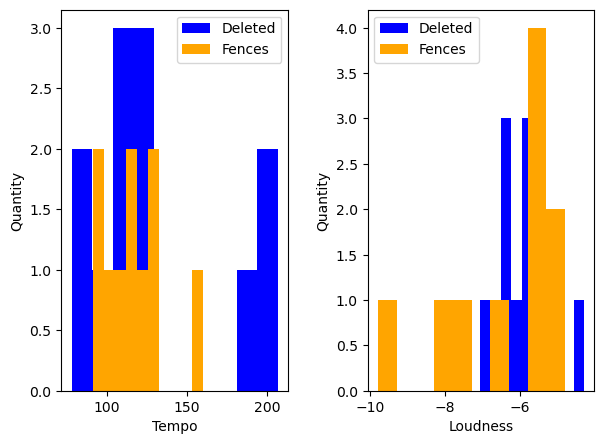

In [20]:
fig1, ax1 = plt.subplots(1,2)
# ax1[0].hist(df_features['tempo'])
ax1[0].hist(del_tempo, label = 'Deleted', color = 'Blue')
ax1[0].hist(fences_tempo, label = 'Fences', color = 'Orange')
ax1[0].legend()
ax1[0].set_xlabel('Tempo')
ax1[0].set_ylabel('Quantity')

ax1[1].hist(del_loud, label = 'Deleted', color = 'Blue')
ax1[1].hist(fences_loud, label = 'Fences', color = 'Orange')
ax1[1].legend()
ax1[1].set_xlabel('Loudness')
ax1[1].set_ylabel('Quantity')

fig1.tight_layout(pad=2)

plt.show()

#### What can you conclude from these histograms?
It looks like I can conclude that the tracks on Caro Emerald's "Deleted Scenes from the Cutting Room Floor" tend to be both faster and louder, defying my expectations. However, both albums have a spread, and I am skeptical of drawing too many conclusions about this sort of data from a histogram.

In addition, loudness may only reflect the volume to which the tracks were mastered. If this is true and the two albums were not treated in an equivalent way, this variable may lose its relevance.

### Scatter Plots

#### Albums Plotted Separately

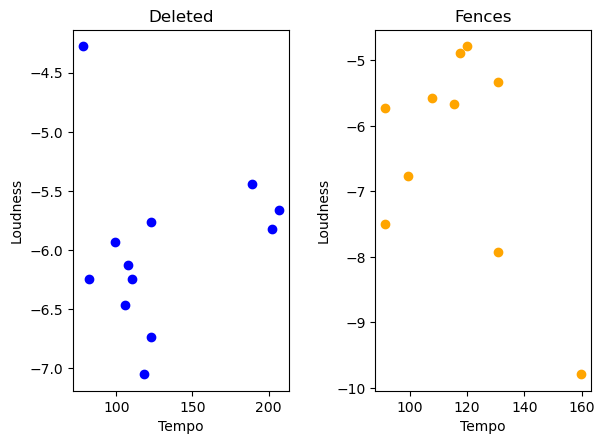

In [21]:
fig2, ax2 = plt.subplots(1,2)
ax2[0].scatter(x = del_tempo, y= del_loud, color = 'Blue')
ax2[0].set_xlabel('Tempo')
ax2[0].set_ylabel('Loudness')
ax2[0].set_title('Deleted')

ax2[1].scatter(x = fences_tempo, y = fences_loud, color = 'Orange')
ax2[1].set_xlabel('Tempo')
ax2[1].set_ylabel('Loudness')
ax2[1].set_title('Fences')

fig2.tight_layout(pad=2)

plt.show()

#### Albums Plotted Together

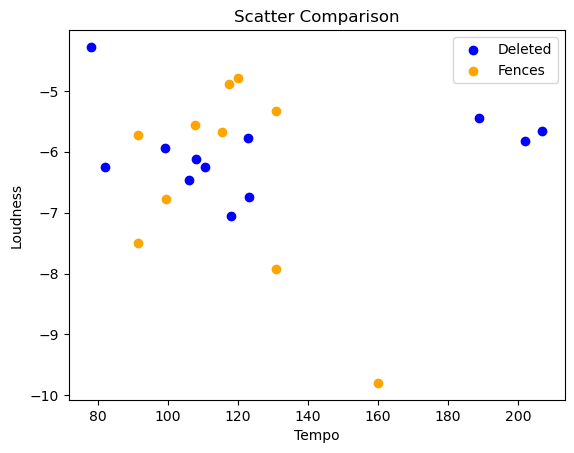

In [22]:
fig2, ax2 = plt.subplots()
ax2.scatter(x = del_tempo, y= del_loud, color = 'Blue', label = 'Deleted')
ax2.scatter(x = fences_tempo, y = fences_loud, color = 'Orange', label = 'Fences')
ax2.legend()
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Loudness')
ax2.set_title('Scatter Comparison')

plt.show()

#### Box Plots of a single feature

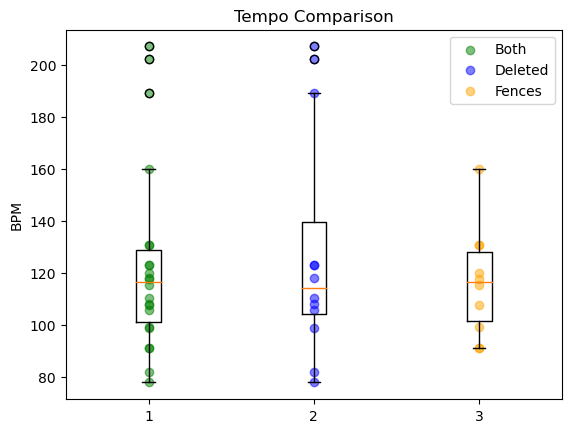

In [23]:
both_xs = [1] * 22
del_xs = [2] * len(del_tempo)
fences_xs = [3] * len(fences_tempo)

fig3, ax3 = plt.subplots()
ax3.boxplot(df_features['tempo'])
ax3.scatter(both_xs, df_features['tempo'], color = 'Green', alpha = .5, label = 'Both')

ax3.boxplot(del_tempo, positions = [2])
ax3.scatter(del_xs, del_tempo, color = 'Blue', alpha = .5, label = 'Deleted')

ax3.boxplot(fences_tempo, positions = [3])
ax3.scatter(fences_xs, fences_tempo, color = 'Orange', alpha = .5, label = 'Fences')

ax3.legend()
ax3.set_ylabel('BPM')
ax3.set_title('Tempo Comparison')

plt.show()

#### For the same feature, test for statistical differences using the ttest_ind() function from the scipy.stats module.

In [24]:
result1 = stats.ttest_ind(del_tempo,fences_tempo)
result1

TtestResult(statistic=0.7980985844973564, pvalue=0.43418806179884917, df=20.0)

#### What do the results of the ttest_ind() function tell you?
The T value is very small and the p value is very high, so there is very little difference between the means of the albums' tempos and a random distribution could easily produce the same result. There is no statistical significance to be found here.